In [1]:
import folium
import pandas as pd
import os
import requests
import json
os.chdir("C:/Users/gy17m2a/OneDrive - University of Leeds/Project/Footfall")

def export_to_csv(base_url):
    print("Exporting report results to JSON file...")

    csv_file = open('report_results.csv', "w", encoding="utf8")
    csv_file.write("Id, Employee_Name"+"\n") #manually modify this CSV file header
    csv_file.close()

    #there are 3 attributes in my example; add/remove levels according to the number of attributes in your case
    r = get_report(base_url)
    report_parsed = json.loads(r)
    print(report_parsed)
    a1_list = report_parsed['data']
    print(a1_list)
    for a1 in a1_list:
        a1_id = a1['id']
        a2_employee_name=a1['employee_name']
        csv_file = open('report_results.csv', "a", encoding="utf8")
        csv_file.write("'"+a1_id + "','" + a2_employee_name +"\n")
        csv_file.close()
  
def get_report(base_url):
    print("Getting report results...")
    header_gs = {'Accept': 'application/json'}
    r = requests.get(base_url)
    if r.ok:
        print("Report results received...")
        print("HTTP %i - %s" % (r.status_code, r.reason))
        return r.text
    else:
        print("HTTP %i - %s" % (r.status_code, r.reason))

## Leeds - 10 sensors with locations

In [2]:
# Locations defined manually using https://open-innovations.github.io/traffic-growth/ and google maps
leeds_sensors = pd.DataFrame({"Latitude":[53.7975, 53.7973, 53.797291, 53.797, 53.7967, 53.798042, 53.7990, 53.7993, 53.7994,
                                         53.801],
                              "Longitude":[-1.5451, -1.5451, -1.54430, -1.5436, -1.5426, -1.547109, -1.54189, -1.5441,
                                        -1.5440, -1.5448], 
                              "Name":["Albion Street North", "Albion Street South", "Commercial Street at Sharps",
                                      "Commercial Street at Barratts","Briggate", "Park row", "Briggate at McDonalds",
                                      "Headrow", "Headrow at Dortmund Square", "Albion Street at Mcdonalds"]})

In [3]:
leeds_map = folium.Map(location=[leeds_sensors.Latitude.mean(),
                           leeds_sensors.Longitude.mean()], zoom_start=16, control_scale=True, min_zoom = 16)
for index, location_info in leeds_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(leeds_map)
leeds_map

## Bologna - 10 sensors with locations

In [4]:
# Locations defined manually using names from csv and google maps
bologna_sensors = pd.DataFrame({"Latitude" : [ 44.498459,44.497270, 44.496760, 44.49711, 44.4966, 44.49709, 44.496354, 44.49562,
                                     44.495472, 44.494406],
                                       "Longitude":[11.356230, 11.353520, 11.354510, 11.352338, 11.3524, 11.3507, 
                                                    11.3507, 11.35503, 11.3491, 11.3467], 
                                       "Name":["Porta San Donato", "Piazza Puntoni", "Via San Giacomo", "Piazza Scaravelli",
                                              "Palazzo Poggi", "Via del Guasto", "Piazza Verdi", "Facolta di Giurisprudenza",
                                              "Piazza Rossini", "Due torri"]})

In [5]:
bologna_map = folium.Map(location=[bologna_sensors.Latitude.mean(),
                           bologna_sensors.Longitude.mean()], zoom_start=17, control_scale=True, min_zoom = 16)
for index, location_info in bologna_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(bologna_map)
bologna_map

## Turin - 8 sensors with locations

In [6]:
# Locations defined manually using names from csv and google maps
torino_sensors = pd.DataFrame({"Latitude":[45.07520, 45.0651, 45.04931, 45.07105, 45.06899, 45.072951, 45.07247,
                                          45.0692],
                                       "Longitude":[7.68022, 7.6692, 7.68529, 7.68598, 7.68608, 7.6863, 7.68952,
                                                   7.6856], 
                                       "Name":["Museo di Arte Orientale", "Gam Galleria Arte Moderna", 
                                 "Borgo Medievale Parco Del Valentino", "Palazzo Madama", "Museo Del Risorgimento",
                                "Palazzo Reale", "Giardini Reali di Torino", "Palazzo Carignano - Cortile"]})
# Also Office test 1 and 2. Not sure of location

In [7]:
torino_map = folium.Map(location=[torino_sensors.Latitude.mean(),
                           torino_sensors.Longitude.mean()], zoom_start=14, control_scale=True, min_zoom = 13)
for index, location_info in torino_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(torino_map)
torino_map

## Cluj-Napoca, Romania - 6 sensors with locations

In [8]:
# Locations defined manually using names from csv and google maps
cluj_sensors = pd.DataFrame({"Latitude":[46.7688, 46.7686, 46.7670, 46.766246, 46.7725, 46.7695],
                                       "Longitude":[23.574, 23.5724, 23.569600, 23.570204, 23.58417, 23.590], 
                                       "Name":["Parcul Stadion", "Cluj Arena 1St Floor Balcony", "Sala Polivalenta", 
                                              "Sala Polivalenta Corner Aleea Stadionului", "Magyar Opera House",
                                              "Unirii Square"]})

# Missing "Casino Roof"
cluj_map = folium.Map(location=[cluj_sensors.Latitude.mean(),
                           cluj_sensors.Longitude.mean()], zoom_start=15, control_scale=True, min_zoom = 13)
for index, location_info in cluj_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(cluj_map)
cluj_map

## Dublin

In [9]:
dublin_sensors = pd.read_csv("dublin_counter_locations.csv")
dublin_sensors.rename(columns={'Counter Locations': 'Name'}, inplace = True)

dublin_map = folium.Map(location=[dublin_sensors.Latitude.mean(),
                           dublin_sensors.Longitude.mean()], zoom_start=15, control_scale=True, min_zoom = 13)
for index, location_info in dublin_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(dublin_map)
dublin_map

## Melbourne

In [10]:
melbourne_sensors = pd.read_csv("melbourne_sensor_locations.csv")
melbourne_sensors.rename(columns={'sensor_description': 'Name'}, inplace = True)
len(melbourne_sensors)

# Plot
melbourne_map = folium.Map(location=[melbourne_sensors.Latitude.mean(),
                           melbourne_sensors.Longitude.mean()], zoom_start=14, control_scale=True, min_zoom = 13)
for index, location_info in melbourne_sensors.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(melbourne_map)
melbourne_map

## Glasgow - CCTV

In [103]:
if os.path.exists("glasgow_cctv.csv"):
    glasgow_springboard = pd.read_csv("glasgow_cctv.csv")
else:
    r = get_report("https://api.glasgow.gov.uk/cctv/v1/get_detection_summaries?startDate=2015-01-01&endDate=2022-09-16")
    report_parsed = json.loads(r)
    a1_list = report_parsed['data']
    glasgow_cctv = pd.DataFrame()
    for a1 in a1_list:
        this_line = pd.concat([pd.DataFrame({'Timestamp':a1['timestamp']}, index = [0])
                                    , pd.DataFrame(a1['camera'], index=[0]), 
                                    pd.DataFrame(a1['objects'], index=[0])], axis =1)    
        glasgow_cctv = pd.concat([glasgow_cctv, this_line], axis = 0)
    
glasgow_cctv.to_csv("glasgow_cctv.csv")

Getting report results...
Report results received...
HTTP 200 - OK


In [104]:
# Remove cameras which don't have location information for some reason
glasgow_cctv = glasgow_cctv[(glasgow_cctv['cameraName'] != 'A83') & (glasgow_cctv['cameraName'] != 'A65')]
glasgow_cctv = glasgow_cctv.drop_duplicates('cameraName', keep='last')

# Plot
glasgow_cctv_map = folium.Map(location=[glasgow_cctv.latitude.mean(),
                           glasgow_cctv.longitude.mean()], zoom_start=12, control_scale=True, min_zoom = 12)
for index, location_info in glasgow_cctv.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["cameraName"]).add_to(glasgow_cctv_map)
glasgow_cctv_map

## Glasgow - Springboard sensors

In [201]:
if os.path.exists("glasgow_springboard.csv"):
    glasgow_springboard = pd.read_csv("glasgow_springboard.csv")
else:
    r = get_report("https://api.glasgow.gov.uk/mobility/v1/footfall/historical?format=json&startDate=2010-01-01&endDate=2022-01-01")
    report_parsed = json.loads(r)
    glasgow_springboard = pd.DataFrame()
    for i in report_parsed:
        this_line = pd.DataFrame({'Timestamp':i['processDate'], 'Count': i['pedestrianCount'],
                           'latitude': i['location']['latitude'], 'longitude': i['location']['longitude'],
                            'name': i['location']['description']},index = [0])
        glasgow_springboard = pd.concat([glasgow_springboard, this_line], axis = 0)
    glasgow_springboard.to_csv("glasgow_springboard.csv")

Getting report results...
Report results received...
HTTP 200 - OK


In [204]:
glasgow_springboard = glasgow_springboard.drop_duplicates('name', keep='last')
glasgow_springboard_map = folium.Map(location=[glasgow_springboard.latitude.mean(),
                           glasgow_springboard.longitude.mean()], zoom_start=12, control_scale=True, min_zoom = 12)
for index, location_info in glasgow_springboard.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["Name"]).add_to(glasgow_springboard_map)
glasgow_springboard_map

## Testing plotting

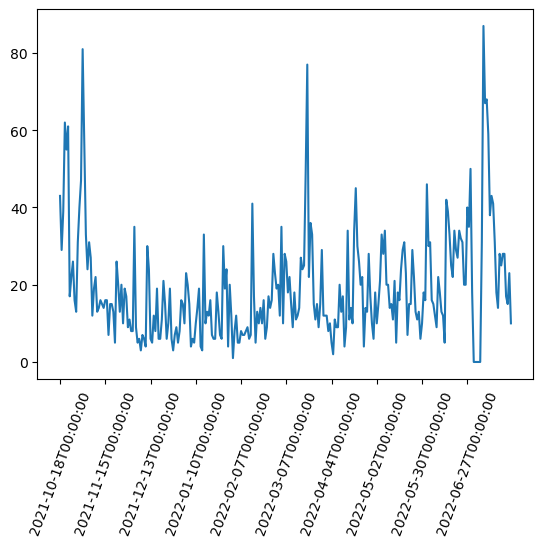

In [113]:
glasgow_data2['location'].unique()
one_camera = glasgow_data2[glasgow_data2['location'] == "Argyle_St_@_Brown_St"]


def make_ticks (file):
    t = file.iloc[:,0]
    ticks = list(t.values.flatten())
    if len(t) <= 10: 
           ticks = ticks
           tick_locations =  [i for i in range(0,len(t))]
    else: 
           ticks = [ticks[i] for i in range(0,len(t),int(len(t)/10))]
           tick_locations =  [i for i in range(0,len(t),int(len(t)/10))]
    return (ticks, tick_locations)        

ticks = make_ticks(one_camera)[0]
tick_locations = make_ticks(one_camera)[1]

fig, ax = plt.subplots()
ax.plot(one_camera['Timestamp'], one_camera['person'])
ax.set_xticks(tick_locations)
ax.set_xticklabels(ticks, rotation=70);

## Testing finding BBOX

In [ ]:
def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)

    return [(min(x_coordinates), min(y_coordinates)), (max(x_coordinates), max(y_coordinates))]

points = [[1, 3], [2, 4], [4, 1], [3, 3], [1, 6]]